In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import TomekLinks
import warnings
warnings.filterwarnings('ignore')

# Reviewing Notes for better understanding

In [2]:
churnData = pd.read_csv('customer_churn.csv')
churnData.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [4]:
# review data imbalance score
numericData = churnData[['tenure', 'SeniorCitizen','MonthlyCharges']]
Y = pd.DataFrame(data=churnData, columns=['Churn'])
transformer = StandardScaler().fit(churnData[['tenure','SeniorCitizen','MonthlyCharges']])
scaled_x = transformer.transform(churnData[['tenure','SeniorCitizen','MonthlyCharges']])
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(scaled_x, churnData['Churn'])
classification.score(scaled_x, churnData['Churn'])

0.7911401391452506

In [5]:
# blind score
5174/(5174+1869)


0.7346301292063041

# Reviewing Notes: increase imbalance

In [6]:
#increasing the imbalance
yes = churnData[churnData['Churn']=='Yes']
no = churnData[churnData['Churn']=='No']
yes = yes.sample(500)

In [7]:
data = pd.concat([yes,no], axis=0)
print(data['Churn'].value_counts())
data.head()

No     5174
Yes     500
Name: Churn, dtype: int64


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
996,6641-XRPSU,Female,0,No,No,34,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),70.00,2416.1,Yes
5100,9940-RHLFB,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,75.30,75.3,Yes
2589,7576-OYWBN,Male,1,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.05,231.8,Yes
4058,2873-ZLIWT,Female,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,84.85,3303.05,Yes
5441,3512-IZIKN,Female,0,Yes,No,70,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Credit card (automatic),65.30,4759.75,Yes


# Reviewing Notes: shuffling data / sampling

In [8]:
#shuffling the data - classes balanced
data = data.sample(frac=1)
data['Churn'].value_counts()

No     5174
Yes     500
Name: Churn, dtype: int64

In [9]:
#re-review the data imbalance score
numericData = data[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(data[['tenure','SeniorCitizen','MonthlyCharges']])
scaled_x = transformer.transform(data[['tenure','SeniorCitizen','MonthlyCharges']])
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(scaled_x, data['Churn'])
classification.score(scaled_x, data['Churn'])

0.913464927740571

# Reviewing Notes: other approach....

In [10]:
#oversampling data
counts = churnData['Churn'].value_counts()
yes = churnData[churnData['Churn']=='Yes'].sample(counts[0], replace=True)
no = churnData[churnData['Churn']=='No']
data = pd.concat([yes,no], axis=0)
data = data.sample(frac=1)
data['Churn'].value_counts()

Yes    5174
No     5174
Name: Churn, dtype: int64

In [11]:
counts = churnData['Churn'].value_counts()
counts

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
X = data[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X, data['Churn'])
classification.score(X, data['Churn'])

0.734441437959026

# Reviewing Notes: undersampling

In [13]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [14]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

rus = RandomUnderSampler()
X = churnData[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
y = churnData['Churn']
X_rus, y_rus = rus.fit_sample(X, y)

In [15]:
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [16]:
y_rus.value_counts()

No     1869
Yes    1869
Name: Churn, dtype: int64

In [17]:
transformer = StandardScaler().fit(X_rus)
X = transformer.transform(X_rus)
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X, y_rus)
classification.score(X, y_rus)

0.7335473515248796

# Reviewing Notes: oversampling data

In [18]:
ros = RandomOverSampler()
X = churnData[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
y = churnData['Churn']
X_ros, y_ros = ros.fit_sample(X, y)

In [19]:
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [20]:
y_ros.value_counts()

Yes    5174
No     5174
Name: Churn, dtype: int64

In [21]:
transformer = StandardScaler().fit(X_ros)
X = transformer.transform(X_ros)
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X, y_ros)
classification.score(X, y_ros)

0.7311557788944724

# Reviewing Notes: SMOTE

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X = churnData[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
y = churnData['Churn']
X_sm, y_sm = smote.fit_sample(X, y)
y_sm.value_counts()

Yes    5174
No     5174
Name: Churn, dtype: int64

In [23]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_sm, y_sm)
classification.score(X_sm, y_sm)

0.7328952454580595

# Reviewing Notes: undersampling w Tomeklinks

In [ ]:
# you need to reset the data first so that you can have the same size of data

In [24]:
X = churnData[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
y = churnData['Churn']
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [25]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_sample(X, y)
y_tl.value_counts()

No     4694
Yes    1869
Name: Churn, dtype: int64

In [26]:
X_tl2, y_tl2 = tl.fit_sample(X_tl, y_tl)
y_tl2.value_counts()

No     4537
Yes    1869
Name: Churn, dtype: int64

In [27]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_tl2, y_tl2)
classification.score(X_tl2, y_tl2)

0.7939431782703715

# Reviewing Notes: tomeklinks for multi-label classification models

In [ ]:
X = churnData[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
y = churnData['Churn']
y.value_counts()

In [ ]:
y[6000:7000] = 'Hello'
y.value_counts()

In [ ]:
tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_sample(X, y)
y_tl.value_counts()

In [ ]:
X_sm, y_sm = smote.fit_sample(X, y)
y_sm.value_counts()

In [ ]:
# tomeklink accuracy score
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_tl, y_tl)
classification.score(X_tl, y_tl)

In [ ]:
#smote accuracy score
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_sm, y_sm)
classification.score(X_sm, y_sm)

# ok, getting to the lab now: setup model

In [28]:
# self-note" nbe sure to run the following with the correct data set available (do not use multi-class data set))
churnData_independent = churnData[['tenure','SeniorCitizen','MonthlyCharges']]
churnData_dependent = churnData['Churn']

In [29]:
churnData_independent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   SeniorCitizen   7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 165.2 KB


In [30]:
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [31]:
transformer = StandardScaler().fit(churnData_independent)
X = transformer.transform(churnData_independent)

In [32]:
#train x.y split
X_train, X_test, y_train, y_test = train_test_split(X, churnData_dependent, test_size=0.3, random_state = 100)


In [33]:
classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

The accuracy of the logistic_regression model is: 0.78 


In [34]:
print("The accuracy of a blind guess is: %4.2f " %  (5174/(5174+1869)))

The accuracy of a blind guess is: 0.73 


[[1392  155]
 [ 308  258]]


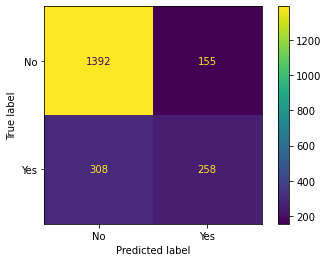

The Kappa of your model is: 0.39


In [38]:
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))

In [37]:
print(classification_report(y_test, y_pred, labels=['Yes','No']))

              precision    recall  f1-score   support

         Yes       0.62      0.46      0.53       566
          No       0.82      0.90      0.86      1547

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



The result of this model is not that bad, but let's try other processes to improve

# SMOTE

In [39]:
from imblearn.over_sampling import SMOTE


In [40]:
oversample = SMOTE()
transformer = StandardScaler().fit(churnData_independent)
Scaled_X = transformer.transform(churnData_independent)
X, y = oversample.fit_resample(Scaled_X, churnData_dependent)
y.value_counts()

Yes    5174
No     5174
Name: Churn, dtype: int64

In [41]:
#x/y split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100)



In [42]:
classification = LogisticRegression(random_state=0, solver='lbfgs',  multi_class='ovr').fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

The accuracy of the logistic_regression model is: 0.74 


[[1164  393]
 [ 408 1140]]


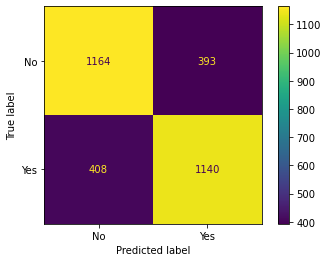

The Kappa of your model is: 0.48


In [43]:
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))

In [44]:
print(classification_report(y_test, y_pred, labels=['Yes','No']))

              precision    recall  f1-score   support

         Yes       0.74      0.74      0.74      1548
          No       0.74      0.75      0.74      1557

    accuracy                           0.74      3105
   macro avg       0.74      0.74      0.74      3105
weighted avg       0.74      0.74      0.74      3105



The results using SMOTE oversampling is slightly better

# TomekLink Undersampling

In [45]:
tl = TomekLinks()
X_tl, y_tl = tl.fit_sample(Scaled_X, churnData_dependent)
y_tl.value_counts()

No     4694
Yes    1869
Name: Churn, dtype: int64

In [46]:
# optimized dataset, using tlinks
X_tl2, y_tl2 = tl.fit_sample(X_tl, y_tl)
y_tl2.value_counts()

No     4537
Yes    1869
Name: Churn, dtype: int64

The accuracy of the logistic_regression model is: 0.79 
[[1226  136]
 [ 261  299]]


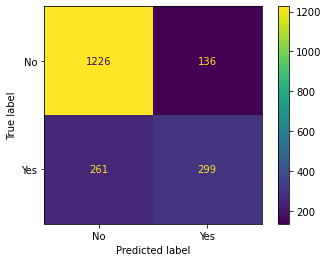

The Kappa of your model is: 0.46
              precision    recall  f1-score   support

         Yes       0.69      0.53      0.60       560
          No       0.82      0.90      0.86      1362

    accuracy                           0.79      1922
   macro avg       0.76      0.72      0.73      1922
weighted avg       0.78      0.79      0.79      1922



In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_tl2, y_tl2, test_size=0.3, random_state = 100)
classification = LogisticRegression(random_state=0, solver='lbfgs',  multi_class='ovr').fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, labels=['Yes','No']))

The result of this model with TomekLinks appears to be improving the model

# SMOTE w Tomek Links

In [50]:
over = SMOTE()
under = TomekLinks()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(Scaled_X, churnData_dependent)

The accuracy of the logistic_regression model is: 0.75 
[[1174  365]
 [ 368 1045]]


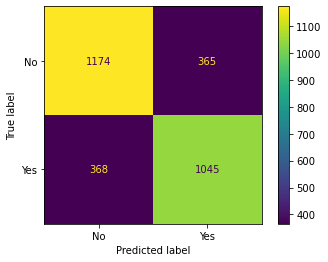

The Kappa of your model is: 0.50
              precision    recall  f1-score   support

         Yes       0.74      0.74      0.74      1413
          No       0.76      0.76      0.76      1539

    accuracy                           0.75      2952
   macro avg       0.75      0.75      0.75      2952
weighted avg       0.75      0.75      0.75      2952



In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100)
classification = LogisticRegression(random_state=0, solver='lbfgs',  multi_class='ovr').fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, labels=['Yes','No']))

SMOTE + TomekLinks results are improving, despite the accuracy score dropping slightly. The kappa score has improve, but recall and accuracy appear to be better with SMOTE

# Conclusion

It appears that the SMOTE methodology provides a better model performance, based on classification score, kappa-score and recall of the model.